## **Importing the Necessary Libraries and Datasets**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
dataset = pd.read_csv("/content/Data_for_UCI_named[1].csv")

In [ ]:
dataset.shape

(10000, 14)

In [ ]:
dataset.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [ ]:
dataset.tail()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable
9999,6.530527,6.781790,4.349695,8.673138,3.492807,-1.390285,-1.532193,-0.570329,0.073056,0.505441,0.378761,0.942631,0.045263,unstable


In [ ]:
dataset.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

## **EXPLORATORY DATA ANALYSIS**

No Null values present so there is no requirement of null values handling

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


By applying **Labelencoder** we have to convert the Last column into the object to float

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['stabf'] = le.fit_transform(dataset['stabf'])
dataset.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 1.1 MB


# Unstable was converted as 1 and stable was converted as 0

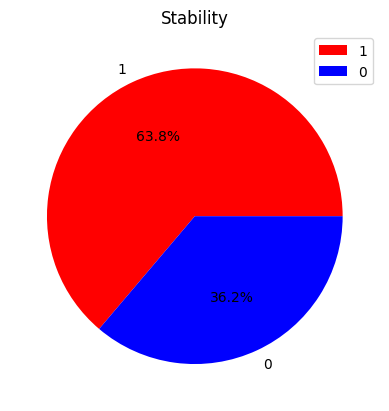

In [ ]:
plt.pie(dataset['stabf'].value_counts(),labels = ['1','0'],autopct = '%1.1f%%',colors = ['red','blue'])
plt.legend()
plt.title("Stability")
plt.show()

From the above image we can confirm that classes was not splitted equally in the target variable

# **checking for the any duplicate rows No duplicate Rows found in the dataset**

In [ ]:
print('----------------')
print('Check for duplicate rows')
print(dataset.duplicated().sum())
print('----------------')

----------------
Check for duplicate rows
0
----------------


statistical summary for each attribute T is Indicating the transpose of the dataset or matrix

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
tau1,10000.0,5.250000,2.742548,0.500793,2.874892,5.250004,7.624690,9.999469
tau2,10000.0,5.250001,2.742549,0.500141,2.875140,5.249981,7.624893,9.999837
tau3,10000.0,5.250004,2.742549,0.500788,2.875522,5.249979,7.624948,9.999450
tau4,10000.0,5.249997,2.742556,0.500473,2.874950,5.249734,7.624838,9.999443
p1,10000.0,3.750000,0.752160,1.582590,3.218300,3.751025,4.282420,5.864418
p2,10000.0,-1.250000,0.433035,-1.999891,-1.624901,-1.249966,-0.874977,-0.500108
p3,10000.0,-1.250000,0.433035,-1.999945,-1.625025,-1.249974,-0.875043,-0.500072
p4,10000.0,-1.250000,0.433035,-1.999926,-1.624960,-1.250007,-0.875065,-0.500025
g1,10000.0,0.525000,0.274256,0.050009,0.287521,0.525009,0.762435,0.999937
g2,10000.0,0.525000,0.274255,0.050053,0.287552,0.525003,0.762490,0.999944


## Correlation Matrix

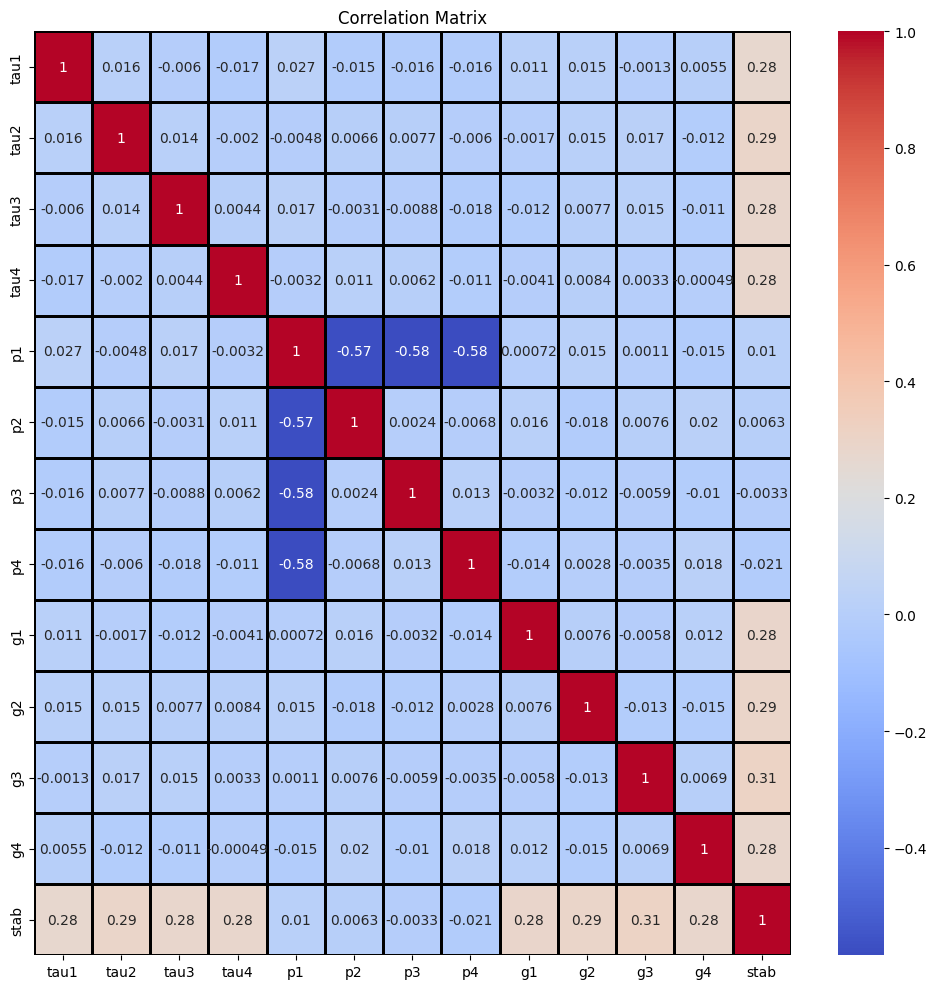

In [ ]:
cols = dataset.columns[:-1]
correlation_matrix = dataset[cols].corr()
plt.figure(figsize = (10,10))
sns.heatmap(correlation_matrix,annot = True ,cmap = 'coolwarm',linewidth = 1,linecolor = 'black')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [ ]:
input = dataset.drop("stabf",axis = 1)
target = dataset['stabf']
print(input.shape)
print(target.shape)

(10000, 13)
(10000,)


## ***BOX PLOT To check Outliers***

<ipython-input-15-f2e90be70992>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


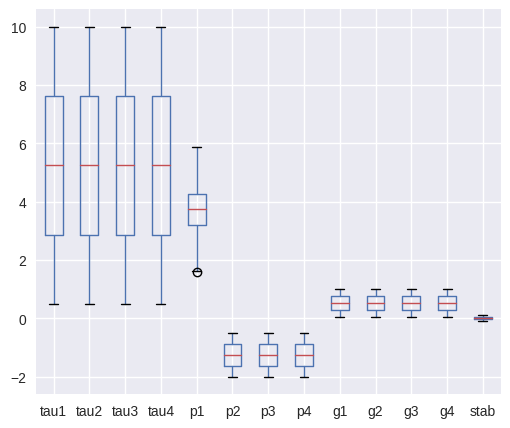

In [ ]:
plt.style.use('seaborn')
input.boxplot(figsize=(6,5))      ##Chceck the outlier
plt.show()

In [ ]:
sns.pairplot(dataset)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

From the above boxplot we come to know that there are no outliers present in the dataset So Need of Outlier Handling

## **Splitting the data int train, and test sets**

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(input,target,test_size = 0.3)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(7000, 13)
(3000, 13)


## **Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## **Applying Logistic Regression algorithm**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
train_result_lr = lr.predict(x_train)
test_result_lr = lr.predict(x_test)
lr_accuracy_score = accuracy_score(y_test,test_result_lr)
print("Training Accuracy : ",accuracy_score(y_train,train_result_lr))
print("Testing Accuracy : ",lr_accuracy_score)

Training Accuracy :  0.9985714285714286
Testing Accuracy :  0.9953333333333333


In [ ]:
print("Confusion Matrix : \n",confusion_matrix(y_test, test_result_lr))

lr_precision_score = precision_score(y_test, test_result_lr)
print("Precision Score of Logistic Regression is : ",lr_precision_score)

lr_recall_score = recall_score(y_test, test_result_lr)
print("recall Score of Logistic Regression is : ",lr_recall_score)

lr_f1_score = f1_score(y_test, test_result_lr)
print("f1 Score of Logistic Regression is : ",lr_f1_score)

Confusion Matrix : 
 [[1070    0]
 [  14 1916]]
Precision Score of Logistic Regression is :  1.0
recall Score of Logistic Regression is :  0.9927461139896373
f1 Score of Logistic Regression is :  0.9963598543941758


## **Applying Perceptron algorithm**

In [ ]:
from sklearn.linear_model import Perceptron
p = Perceptron()
p.fit(x_train,y_train)
train_result_pr = p.predict(x_train)
test_result_pr = p.predict(x_test)
pr_accuracy_score = accuracy_score(y_test,test_result_pr)
print("Training Accuracy: ", accuracy_score(y_train,train_result_pr))
print("Test Accuracy: ",pr_accuracy_score )

Training Accuracy:  0.9884285714285714
Test Accuracy:  0.982


In [ ]:
print("Confusion Matrix of Perceptron is : \n",confusion_matrix(y_test, test_result_pr))

pr_precision_score = precision_score(y_test, test_result_pr)
print("Precision Score of Perceptron is : ",pr_precision_score)

pr_recall_score = recall_score(y_test, test_result_pr)
print("recall Score of Perceptron is : ",pr_recall_score)

pr_f1_score = f1_score(y_test, test_result_pr)
print("f1 Score of Perceptron is : ",pr_f1_score)

Confusion Matrix of Perceptron is : 
 [[1063    7]
 [  47 1883]]
Precision Score of Perceptron is :  0.9962962962962963
recall Score of Perceptron is :  0.9756476683937824
f1 Score of Perceptron is :  0.9858638743455498


## **Applying Random Forest algorithm**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, max_depth=6, min_samples_split=4,min_samples_leaf = 2, random_state=42)
rf.fit(x_train, y_train)
train_result_rf = rf.predict(x_train)
test_result_rf = rf.predict(x_test)
rf_accuracy_score = accuracy_score(y_test,test_result_rf)
print("Training Accuracy: ", accuracy_score(y_train,train_result_rf))
print("Test Accuracy: ",rf_accuracy_score )

Training Accuracy:  1.0
Test Accuracy:  0.995


# **# Hyperparameter Tuning for the RandomForest algorithm**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [6, 8,10,20],  # Maximum depth of individual trees
    'min_samples_split': [4, 6, 8],  # Minimum samples required to split a node
    'min_samples_leaf': [2, 4],   # Minimum samples required at each leaf node
}

rfc = RandomForestClassifier()

# Create a GridSearchCV object                                                      ##Hyper Parameter tuning of Random Forest
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10, scoring='accuracy')

grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 50}
Best Score: 1.0


In [ ]:
rf_accuracy_score = grid_search.best_score_

In [ ]:
print("Confusion Matrix of Random Forest is  : \n",confusion_matrix(y_test, test_result_rf))

rf_precision_score = precision_score(y_test, test_result_rf)
print("Precision Score of Random Forest is : ",rf_precision_score)

rf_recall_score = recall_score(y_test, test_result_rf)
print("recall Score of Random Forest is : ",rf_recall_score)

rf_f1_score = f1_score(y_test, test_result_rf)
print("f1 Score of Random Forest is : ",rf_f1_score)

Confusion Matrix of Random Forest is  : 
 [[1070    0]
 [  15 1915]]
Precision Score of Random Forest is :  1.0
recall Score of Random Forest is :  0.9922279792746114
f1 Score of Random Forest is :  0.9960988296488946


## **Applying SVC algorithm**

In [ ]:
from sklearn.svm import SVC
svc = SVC(C = 10,kernel = "linear",gamma="auto")
svc.fit(x_train,y_train)
train_result_svm = svc.predict(x_train)
test_result_svm = svc.predict(x_test)
svm_accuracy_score = accuracy_score(y_test,test_result_svm)
print("Training Accuracy: ", accuracy_score(y_train,train_result_svm))
print("Test Accuracy: ",svm_accuracy_score)

Training Accuracy:  0.9984285714285714
Test Accuracy:  0.9943333333333333


# **HyperParameter Tuning for SVC**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
para_grid = {'C':[0.1, 1, 10,15],"kernel":['linear', 'rbf', 'poly'],'gamma': ['auto', 'scale']}
svc = SVC()
grid_search = GridSearchCV(svc,para_grid,cv = 5,scoring='accuracy')
grid_search.fit(x_train,y_train)

print("Best hyperparameters : ",grid_search.best_params_)
best_svc = grid_search.best_estimator_
test_accuracy = best_svc.score(x_test, y_test)
print("Test Accuracy:", test_accuracy)

Best hyperparameters :  {'C': 15, 'gamma': 'auto', 'kernel': 'linear'}
Test Accuracy: 0.9933333333333333


In [ ]:
svm_accuracy_score = test_accuracy

In [ ]:
print("Confusion Matrix of Support Vector Machine : \n",confusion_matrix(y_test, test_result_svm))

svm_precision_score = precision_score(y_test, test_result_svm)
print("Precision Score of Support Vector Machine is : ",svm_precision_score)

svm_recall_score = recall_score(y_test, test_result_svm)
print("recall Score of Support Vector Machine is : ",svm_recall_score)

svm_f1_score = f1_score(y_test, test_result_svm)
print("f1 Score of Support Vector Machine is : ",svm_f1_score)

Confusion Matrix of Support Vector Machine : 
 [[1070    0]
 [  17 1913]]
Precision Score of Support Vector Machine is :  1.0
recall Score of Support Vector Machine is :  0.9911917098445596
f1 Score of Support Vector Machine is :  0.9955763726255529


## KNearest Neighbour **Algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=49,metric = "manhattan",weights= "distance")
knn.fit(x_train, y_train)
train_result_knn = knn.predict(x_train)
test_result_knn = knn.predict(x_test)
knn_accuracy_score = accuracy_score(y_test,test_result_knn)
from sklearn.metrics import accuracy_score
print("Training Accuracy: ", accuracy_score(y_train,train_result_knn))
print("Test Accuracy: ",knn_accuracy_score )

Training Accuracy:  1.0
Test Accuracy:  0.966


**# Hyperparameter Tuning for the KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
arr = np.arange(1,100,2)
param_grid = {"n_neighbors":arr,"weights":["uniform","distance"],"metric":["euclidean","manhattan"]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn,param_grid,cv = 5,scoring = "accuracy")
grid_search.fit(x_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
best_knn = grid_search.best_estimator_
test_accuracy = best_knn.score(x_test, y_test)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 57, 'weights': 'distance'}
Test Accuracy: 0.9666666666666667


In [ ]:
print("Confusion Matrix  of  Knearest Neighbour : \n",confusion_matrix(y_test, test_result_knn))

knn_precision_score = precision_score(y_test, test_result_knn)
print("Precision Score of Knearest Neighbour is : ",knn_precision_score)

knn_recall_score = recall_score(y_test, test_result_knn)
print("recall Score of Knearest Neighbour is : ",knn_recall_score)

knn_f1_score = f1_score(y_test, test_result_knn)
print("f1 Score of Knearest Neighbour is : ",knn_f1_score)

Confusion Matrix  of  Knearest Neighbour : 
 [[ 987   83]
 [  19 1911]]
Precision Score of Knearest Neighbour is :  0.9583751253761283
recall Score of Knearest Neighbour is :  0.9901554404145078
f1 Score of Knearest Neighbour is :  0.9740061162079511


## **Plotting bargraph for all different accuracy scores of all models**

In [ ]:
all_model_accuracies = [lr_accuracy_score,pr_accuracy_score,rf_accuracy_score,svm_accuracy_score,knn_accuracy_score]

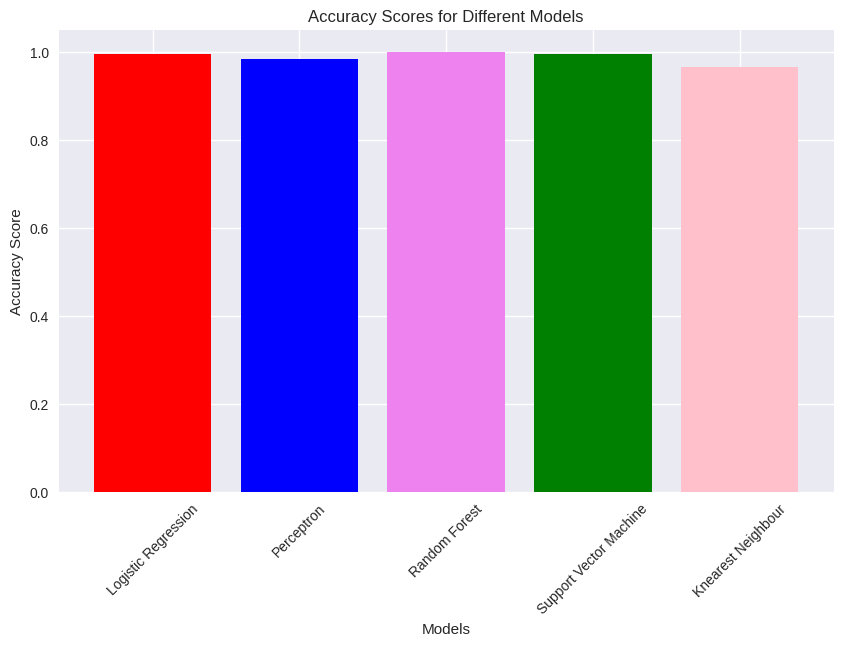

In [ ]:

models = ['Logistic Regression', 'Perceptron', 'Random Forest', 'Support Vector Machine', 'Knearest Neighbour']
c = ["red","blue","violet","green","pink"]
plt.figure(figsize=(10 , 6))
plt.bar(models, all_model_accuracies, color=c)


plt.title('Accuracy Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')


plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()


## **Plotting bargraph for all different Precision scores of all models**

In [ ]:
all_precision_scores = [lr_precision_score,pr_precision_score,rf_precision_score,svm_precision_score,knn_precision_score]

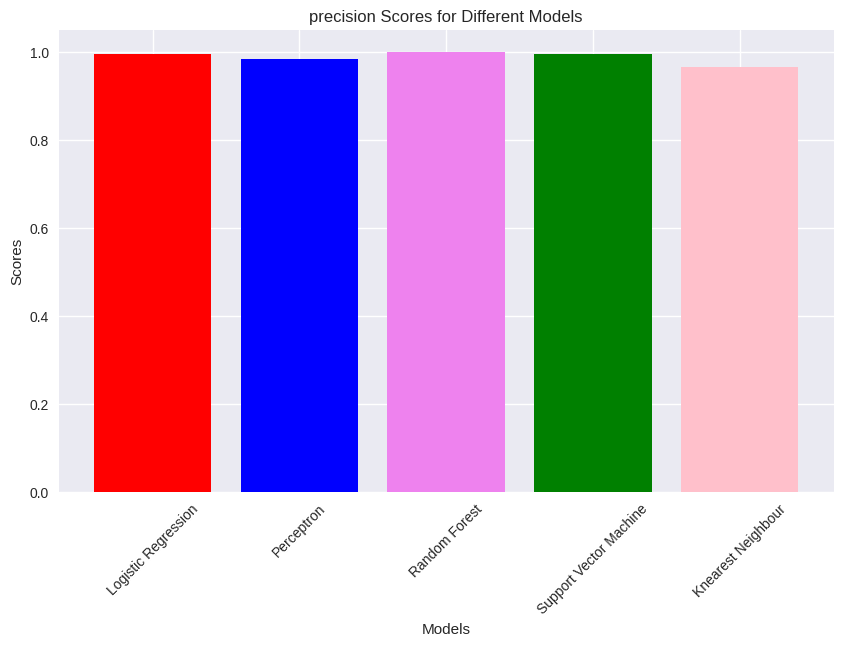

In [ ]:

models = ['Logistic Regression', 'Perceptron', 'Random Forest', 'Support Vector Machine', 'Knearest Neighbour']
c_accuracy = ["red","blue","violet","green","pink"]
plt.figure(figsize=(10 , 6))
plt.bar(models, all_model_accuracies, color=c_accuracy)


plt.title('precision Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('Scores')


plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()


## **Plotting bargraph for all different recall scores of all models**

In [ ]:
all_recall_scores = [lr_recall_score,pr_recall_score,rf_recall_score,svm_recall_score,knn_recall_score]

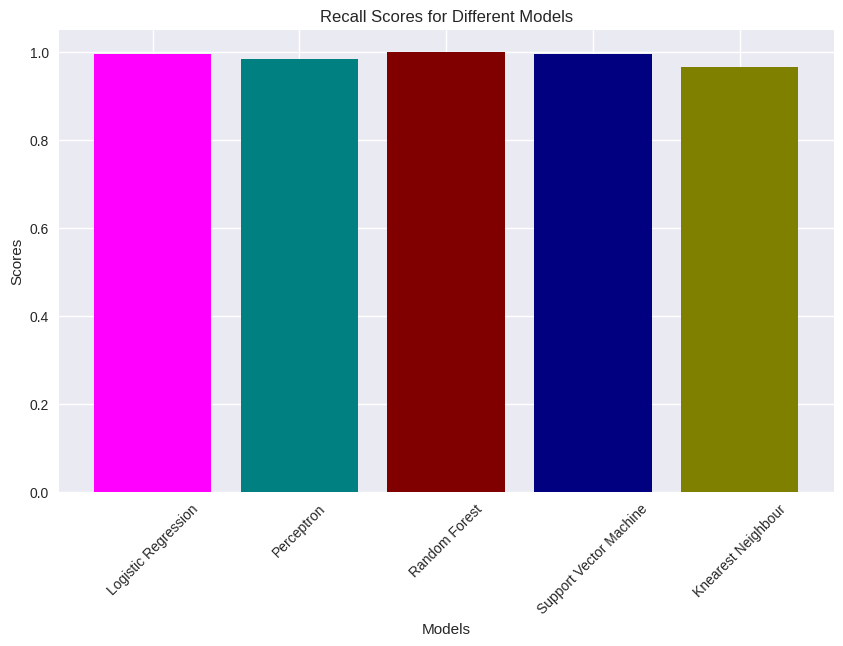

In [ ]:

models = ['Logistic Regression', 'Perceptron', 'Random Forest', 'Support Vector Machine', 'Knearest Neighbour']
c_recall = ["Magenta","Teal","Maroon","Navy","Olive"]
plt.figure(figsize=(10 , 6))
plt.bar(models, all_model_accuracies, color=c_recall)


plt.title('Recall Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('Scores')


plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()


## **Plotting bargraph for all different F1 scores of all models**

In [ ]:
all_f1_scores = [lr_f1_score,pr_f1_score,rf_f1_score,svm_f1_score,knn_f1_score]

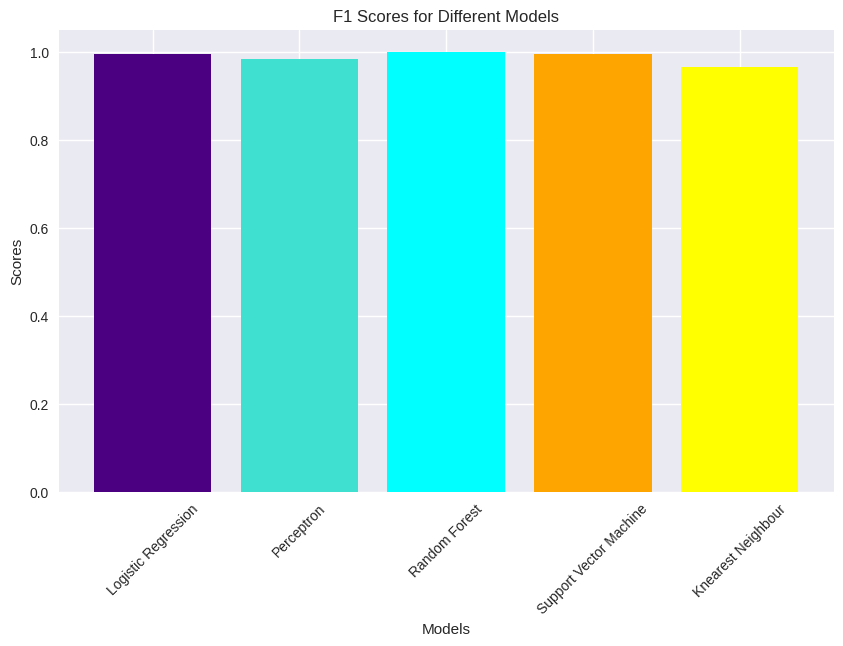

In [ ]:

models = ['Logistic Regression', 'Perceptron', 'Random Forest', 'Support Vector Machine', 'Knearest Neighbour']
c_f1 = ["Indigo","Turquoise","Cyan","Orange","Yellow"]
plt.figure(figsize=(10 , 6))
plt.bar(models, all_model_accuracies, color=c_f1)


plt.title('F1 Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('Scores')


plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()


In [4]:
import numpy as np
import pandas as pd
a = [[1,3,5,7,9],[2,4,6,8,10]]
print(a[1])

[2, 4, 6, 8, 10]


### **THANK YOU **